## Simple Implementation for the Linear Regression Algorithm

#### We will use 
    - Numpy for implementing the matrices ops
    - Matplotlib for visualizing
    - sklearn for generating toy data to play with



### But What is Linear Regression
The idea of linear regression is quite simple, you just try to draw a line that fits your data in a good way, to be able to use this line for predicting other data with a good accuracy, the line represents the function (like `y = a+bx`) and you are trying to determine the values of a and b to make the equation makes sense with your data and represents the characteristics of it, so you just feed your x values and get the y values you want.
<img src="http://ictedusrv.cumbria.ac.uk/maths/SecMaths/U4/images/pic111.gif">

#### So How to Adjust these values? 
Logically,
#####   `good accuracy = less errors`
and if we reached the values of our coefficients that makes less error, we will reach the line that fits the data better, So thinking of that, we need a way that changes the coefficients by reducing the error, and here comes the <b> gradient descent method </b>

### Gradient Descent

<img src="http://eli.thegreenplace.net/images/2016/regressionfit.gif">
let's assume that we are working with a very simple line equation <b> <i> y = a + bx </i> </b> where <b> a</b> is the intersection of the line with the <b>y</b> axis and <b>b</b> is the slope of the line , these 2 parameters we are intersted in adjusting 
so we first need to give them an initial values so we can adjust , let's make <b> <i> a = 0 , b = 0 </i> </b> so we get the equation of <b> <i> y = 0 + 0x </i> </b> , that's the x-axis
then let's try to calculate the error, by feeding our data to the line and comparing the output with the desired one in our dataset and see what we get, and gradually we change the values of <b> <i> a and b </i> </b> so we reduce the error, so all we need to know is the direction of reducing the error, we need the guide to this direction, and that's the gradient descent thing

The main job of Gradient descent algorithm is minimizing any function by changing it's parameters, so we can use it to minimize the error function 
##### <b> <font color="red"> spoiler alert </font> </b> 
<i>we will use some math here <i>

but don't be panic, it's quite straightforward, all we need to do is
- define the error function
- define it's derivative according to a and b
- use these derivative to update a and b 
let's start with defining the error function

<b> <i> ```E = (1/2m)*((a + bx) - desired_y)^2 ```</i> </b>

where m = the size of the data set

then use differentiation to compute it's derivative according to a and b 

<b> <i> ```dE/da = (1/m) * ((a + bx) - desired_y) ```</i> </b>

<b> <i> ```dE/db = (1/m) * ((a + bx) - desired_y) * x ```</i> </b>

finally, let's update

<b> <i> ``` a -= alpha * dE/da ```</i> </b>

<b> <i> ``` b -= alpha * dE/db ```</i> </b>


alpha here is the learning rate, which determine the size of each step we take in updating the parameter 

Here is a little sketch of what we have done here 
<img src="gda.png">

Here is the code, I tried to make it as simple, insightful as possible to walke through , I wrote it in python 3.5 with numpy, matplotlib and sikitlearn 
and here is 2 videos I made for this topic , they are in arabic 

####  <a href="https://youtu.be/Kx_H2t4BGaU"> 1. introduction to Gradient Descent with linear regression in theory(Arabic) </a>
<img src="gd.png" width=700>

<br>

#### <a href="https://youtu.be/Kx_H2t4BGaU"> 2. introduction to Gradient Descent with linear regression implementation(Aabic) </a>
<img  src="gdimp.png" width=700 >


In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:

class LinearRegression(object):
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.errors = []
        self.b0_errors = []
        self.b1_errors = []
    def train(self, x, y,initial_b0 = 0, initial_b1 = 0, num_itrs = 100000, alpha = .01):
        '''
        using train function to do the gradient descent with some logs
        '''
        self.b0 = initial_b0
        self.b1 = initial_b1
        print("Starting gradient descent at b0 = {0}, b1 = {1}".format(self.b0, self.b1))
        print("Running...")
        self.gradient_descent(x,y, alpha, num_itrs)
        print("After {0} iterations b0 = {1}, b1 = {2}".format(num_itrs, self.b0, self.b1))
        print("errors moved from {0} to {1}".format(self.errors[0], self.errors[-1]))
    
    def predict(self, x, b0=None, b1=None):
        '''
        predicting the y using the current b0 and b1, with optional assignment for them
        
        '''
        if b0 == None or b1 == None:
            b0 = self.b0
            b1 = self.b1
        x = np.array(x)
        prediction = b0 + b1 * x
        return prediction
    
    def compute_cost(self, x, y):
        '''
        Comput cost for linear regression
        '''
        #Number of training samples
        m = len(y)

        predictions = self.predict(x)

        sq_errs = ((predictions - y) ** 2).sum()


        return sq_errs/(2*m)


    def gradient_descent(self, x, y, alpha, num_iters):
        '''
        preform the gradient descent to adjust b0 and b1
        '''
        self.b0 = 0
        self.b1 = 0
        m = len(y)
        self.errors = []
        for i in range(num_iters):

            predictions = self.predict(x, self.b0, self.b1)
            
            b0_grad = (1/m) * (predictions - y).sum()
            b1_grad = (1/m) * x.T.dot(predictions - y)
            
            self.b0 -= alpha * b0_grad
            self.b1 -= alpha * b1_grad

            self.errors.append(self.compute_cost(x,y))
            self.b0_errors.append(abs(b0_grad))
            self.b1_errors.append(abs(b1_grad))

        
    
    def plot_errors(self):
        plt.plot(self.errors)
        plt.show()
    
    def plot_b0_b1_errors(self):
        fig, axes = plt.subplots(ncols=2)
        axes[0].plot(self.b0_errors, label="b0 errors", )
        axes[1].plot(self.b1_errors, label="b1 errors")
        plt.show()
 



### using linear regression with simple small dataset

In [35]:
from sklearn.datasets import make_regression

In [36]:
x, y = make_regression(n_features=1,  n_samples=50)
x = x.flatten(1)

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  from ipykernel import kernelapp as app


In [37]:
y

array([ -2.78507443,  37.28100194,  13.65109762,  12.26019511,
        -1.33690058,  -2.18556092,  18.64547361,   5.9182658 ,
         9.82493414,  28.32319442, -14.2365846 ,  16.25133899,
        -8.82180695,  -2.05324204,   9.86928401,  -9.03500506,
         8.22502215,  24.38052024, -18.29232586,   8.83058618,
        39.11938927, -15.62144781, -15.44435217,  10.12841239,
        11.88442652, -13.24841551,   9.63856664, -14.45499787,
         7.72416692,  30.12169156,  -1.00701678, -15.07431836,
        -6.6017014 ,  15.57433931,  -7.03547341,   1.34629094,
       -16.17186804,   0.51642812,   0.30228117,  -2.15012391,
       -19.77112987,  -7.13271415,  -9.20748405,   5.64872973,
        -3.31565458,   5.37976998,  11.6616435 , -11.33992303,
        -6.59188085,   8.1669968 ])

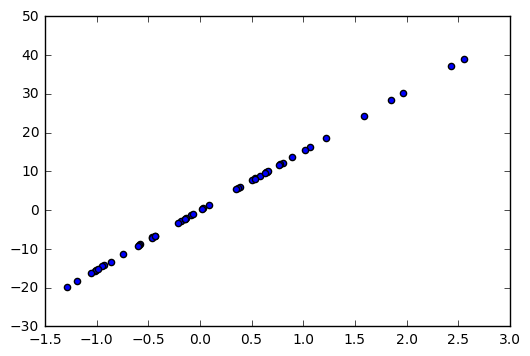

In [38]:
plt.scatter(x,y)
plt.show()

In [39]:
l_reg = LinearRegression()

In [40]:
l_reg.train(x,y,num_itrs=1000, alpha = .0015)
#l_reg.gradient_descent(x,y, num_iters=100, alpha=.005)

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 1000 iterations b0 = 0.9467716988757369, b1 = 11.111850401510209
errors moved from 103.0293328125128 to 7.573616614173497


In [41]:
ypred = l_reg.predict(x)

In [42]:
sum(y)

127.75904482403662

In [43]:
sum(ypred)

140.01620391257597

In [44]:
for i in range(len(y)):
    print(y[i], ypred[i])

-2.7850744274 -1.07354762128
37.2810019424 27.9907629681
13.6510976246 10.8494069753
12.2601951119 9.84043314281
-1.3369005774 -0.0230286192316
-2.18556091618 -0.638654852349
18.6454736055 14.4723745295
5.91826580351 5.23993766493
9.82493413608 8.07387180761
28.3231944166 21.4926847004
-14.2365845993 -9.3805813643
16.2513389898 12.7356466447
-8.82180695144 -5.4526504664
-2.05324204062 -0.542669489052
9.86928401064 8.10604362591
-9.03500506452 -5.60730639324
8.22502214613 6.91328052429
24.3805202441 18.6326315811
-18.2923258602 -12.3226544186
8.83058617908 7.35256239888
39.1193892687 29.324346515
-15.621447812 -10.3851742315
-15.4443521707 -10.256707379
10.1284123942 8.2940178052
11.8844265183 9.56784705239
-13.248415509 -8.66375416392
9.63856664269 7.93867906596
-14.4549978692 -9.53902041516
7.72416691612 6.54995540528
30.1216915608 22.7973315321
-1.00701678035 0.21627220592
-15.0743183605 -9.98828135471
-6.60170140293 -3.8421649123
15.5743393115 12.2445446776
-7.03547340773 -4.1568272

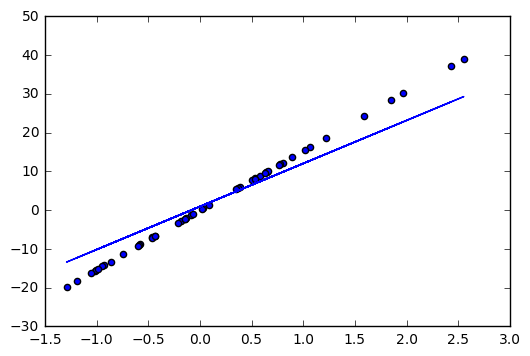

In [45]:
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

and if we trained it more by increasing the number of itrations

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 10000 iterations b0 = 7.615902193805463e-05, b1 = 15.31793018364427
errors moved from 103.0293328125128 to 6.741761015530938e-09


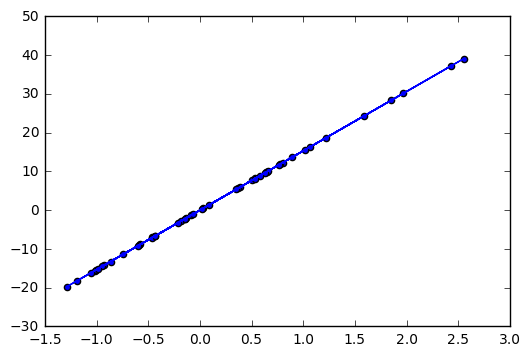

In [46]:
l_reg.train(x,y,num_itrs=10000, alpha = .0015)
ypred = l_reg.predict(x)
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

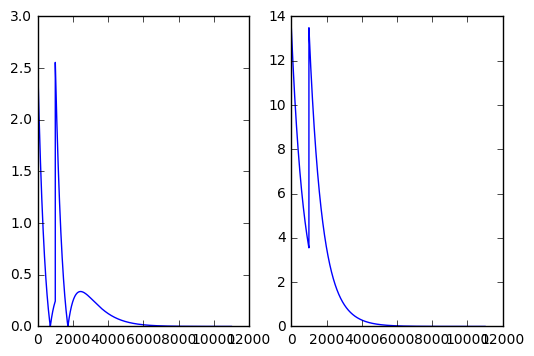

In [47]:
l_reg.plot_b0_b1_errors()

### More Noisy Data
Linear Regression isn't great for all the situations , it's great for simple data,  but not so powerful in the noisy ones

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  from ipykernel import kernelapp as app


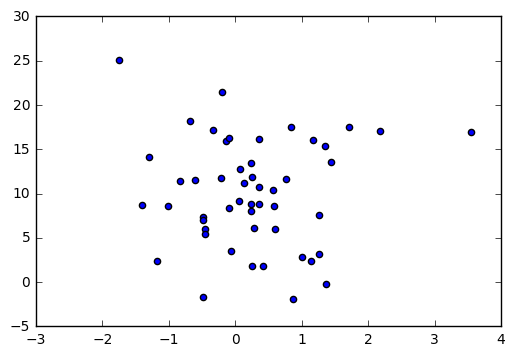

In [48]:
x, y = make_regression(n_features=1,  n_samples=50, noise=7, bias=10)
x = x.flatten(1)
plt.scatter(x,y)
plt.show()

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 10000 iterations b0 = 10.07937420878512, b1 = -0.012798964839079215
errors moved from 68.72167664799322 to 18.11825460918229


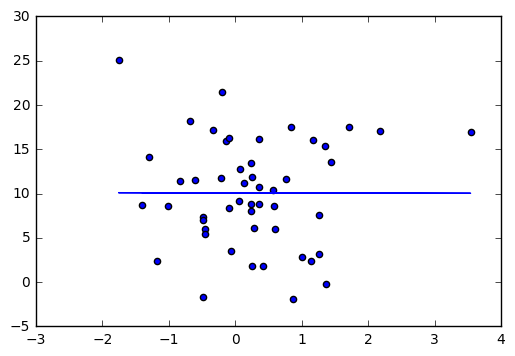

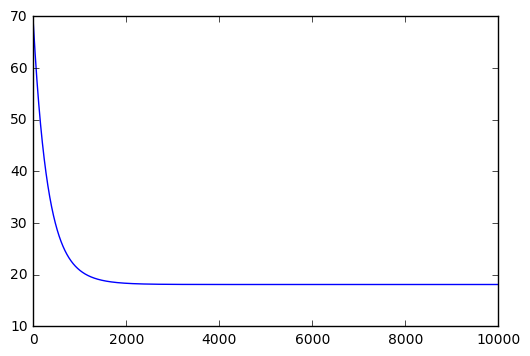

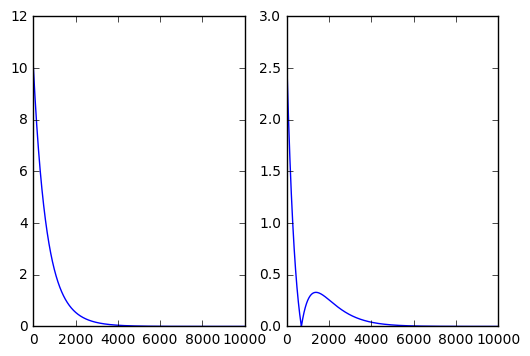

68.721676648 18.1182546092


In [49]:
reg1 = LinearRegression()
reg1.train(x,y,num_itrs=10000, alpha = .0015)
yprid1 = reg1.predict(x)
plt.scatter(x,y)
plt.plot(x,yprid1)
plt.show()
reg1.plot_errors()
reg1.plot_b0_b1_errors()
print(reg1.errors[0], reg1.errors[-1])

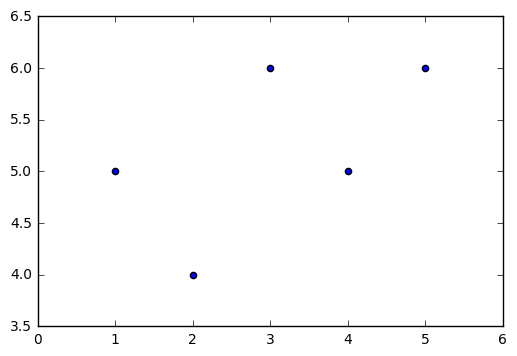

In [50]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)
plt.scatter(xs,ys)
plt.show()

In [51]:
l2= LinearRegression()
l2.train(xs,ys, num_itrs=1000)
print(l2.b0, l2.b1)

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 1000 iterations b0 = 3.578721261638848, b1 = 0.49978264478427553
errors moved from 11.076165999999999 to 0.23734666564005832
3.57872126164 0.499782644784


In [52]:
pred = l2.predict(xs)

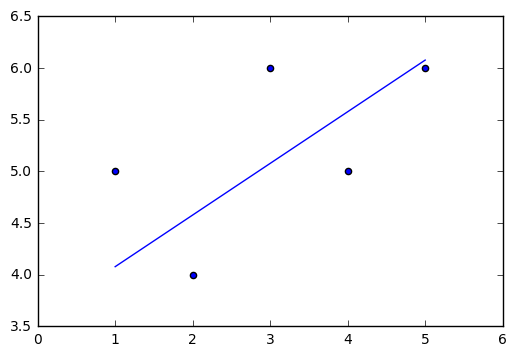

In [53]:
plt.scatter(xs,ys)
plt.plot(xs,pred)
plt.show()